# Fisheries Contest - Image Viewer

In [30]:
!sudo mkdir /mnt/azurefs

In [31]:
!sudo mount -t cifs //kagglestore01.file.core.windows.net/kagglefs01 /mnt/azurefs -o vers=3.0,username=kagglestore01,password=naRdAG2MtqFMLZEd1LhCg1fmK+/zkqUBaLpr4QviN0OnbK7CUS3ZoOHFdJf1XrCmZLHQB/Cfsy0DFolEia9gdA==,dir_mode=0777,file_mode=0777

In [1]:
#import modules
from utils import *
from vgg16 import Vgg16

data_path = '/mnt/azurefs/data/fisheries/'
train_path = data_path + 'train/'
test_path = data_path + 'test_stg1/'

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [2]:
vgg = Vgg16()

/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [3]:
batch_size=64
batches = vgg.get_batches(train_path, batch_size=batch_size)

Found 3777 images belonging to 8 classes.


In [4]:
# training set distribution
classes = [ item for item in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, item)) ]
for c in classes:
    DIR = train_path + c + '/'
    print c, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

ALB 1719
BET 200
DOL 117
LAG 67
NoF 465
OTHER 299
SHARK 176
YFT 734


ALB/img_03384.jpg
(1280, 750)


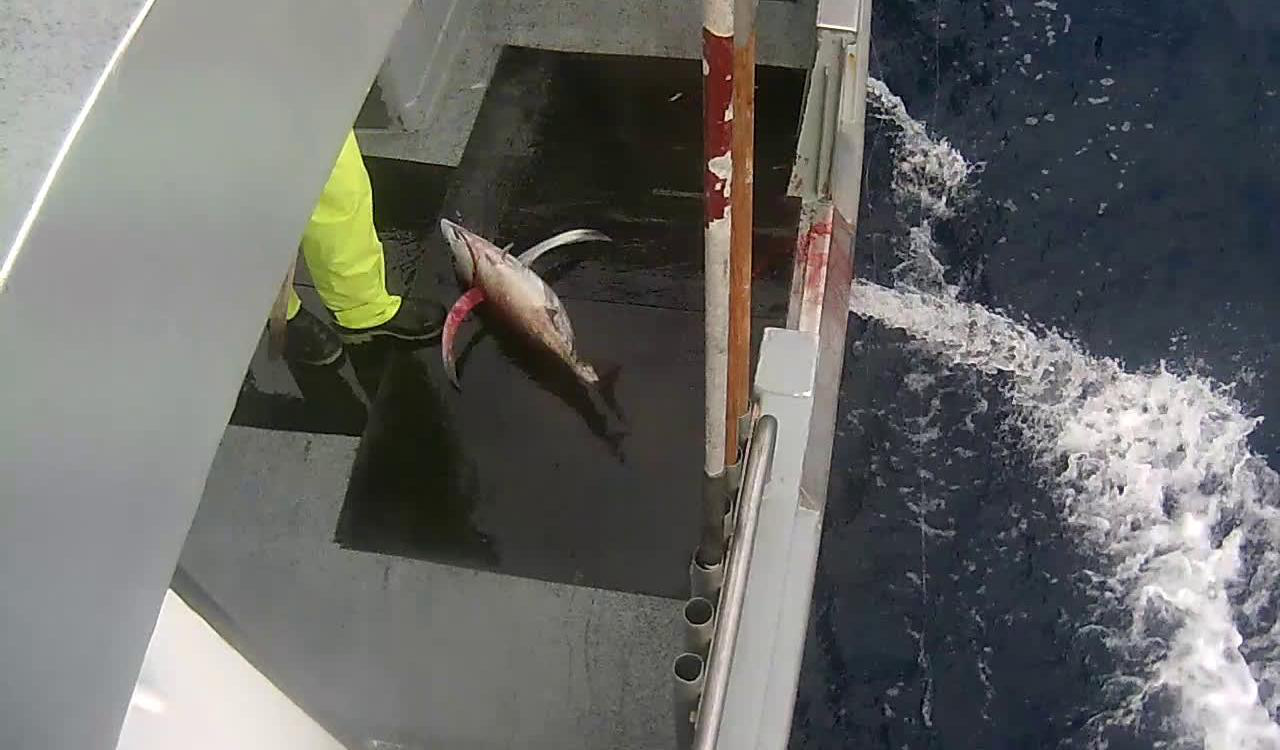

In [9]:
from PIL import Image
import random

# randomly look at training image
image_path = random.choice(batches.filenames)
print(image_path)
print(Image.open(train_path + image_path).size)
Image.open(train_path + image_path)


In [6]:
batch_size=64
test_batches = vgg.get_batches(test_path, batch_size=batch_size)

Found 1000 images belonging to 1 classes.


unknown/img_03805.jpg
(1280, 720)


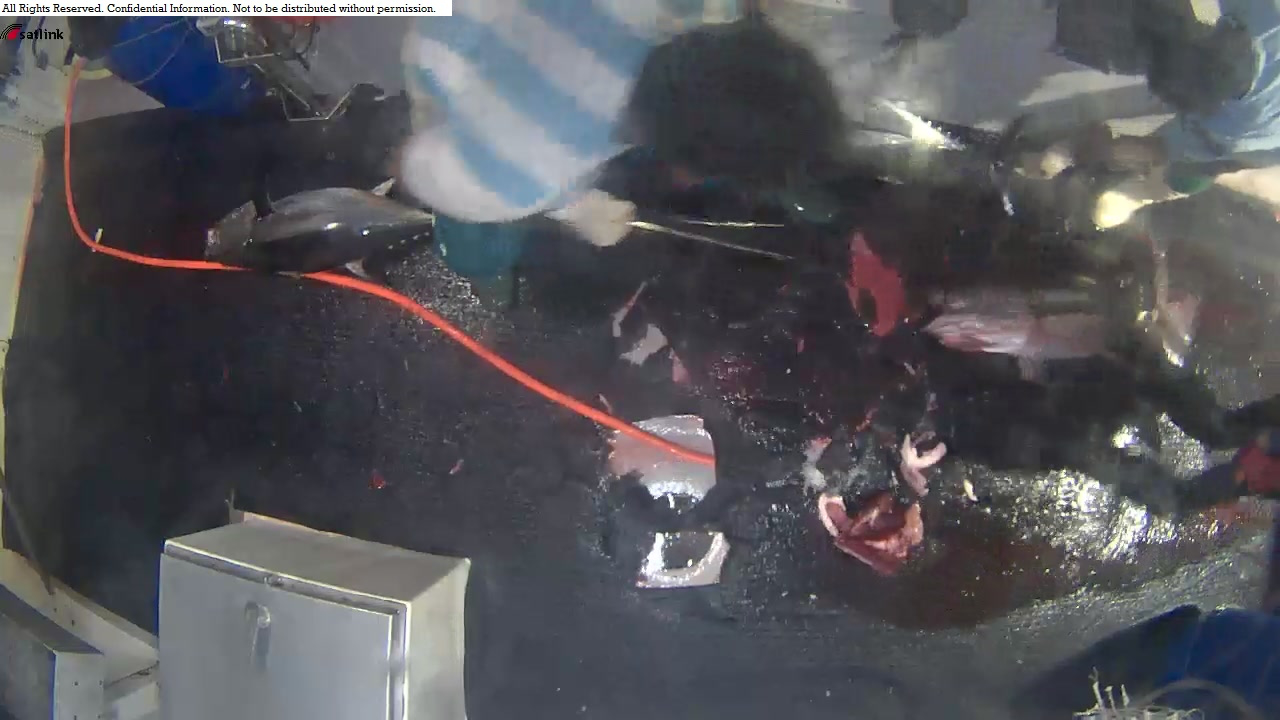

In [7]:
# randomly look at test image
image_path = random.choice(test_batches.filenames)
print(image_path)
print(Image.open(test_path + image_path).size)
Image.open(test_path + image_path)

LAG/img_02089.jpg
(1280, 720)


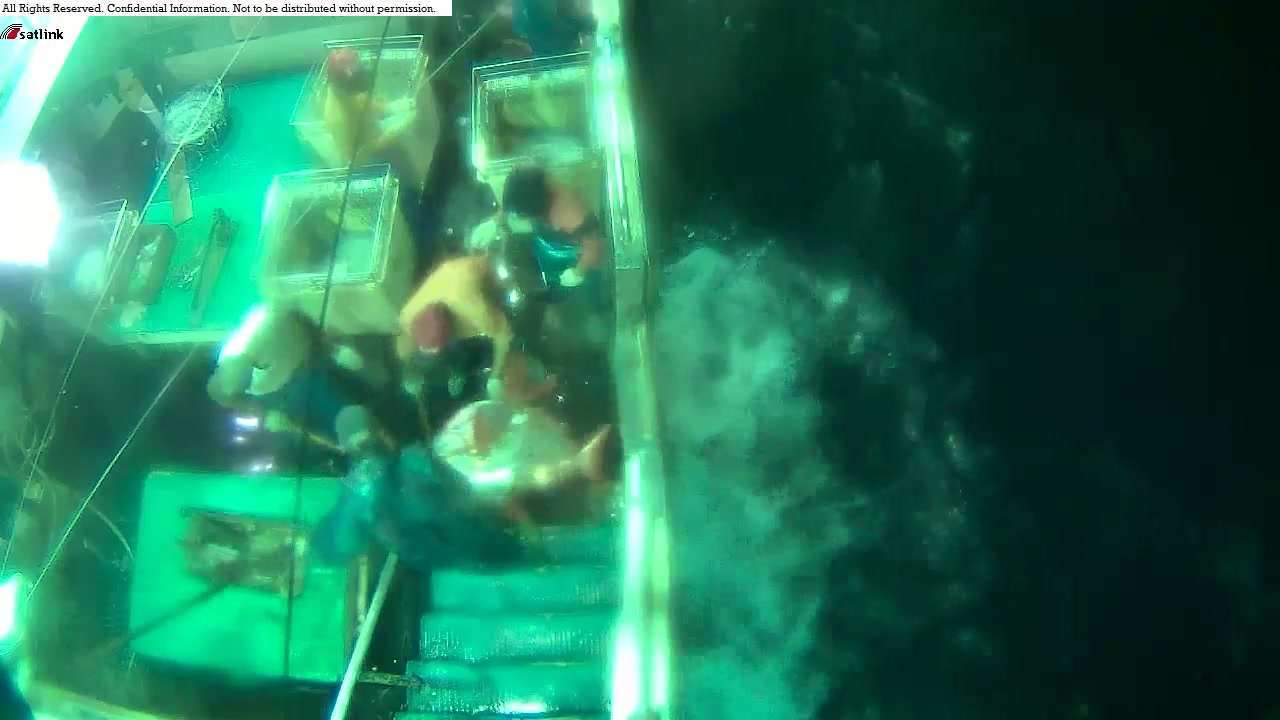

In [8]:
# random select train image from class
c = 'LAG'  # ALB, BET, DOL, YFT, OTHER, SHARK, NoF, LAG
filename_subset = [filename for filename in batches.filenames if c in filename]
image_path = random.choice(filename_subset)
print(image_path)
print(Image.open(train_path + image_path).size)
Image.open(train_path + image_path) 

(384, 512)


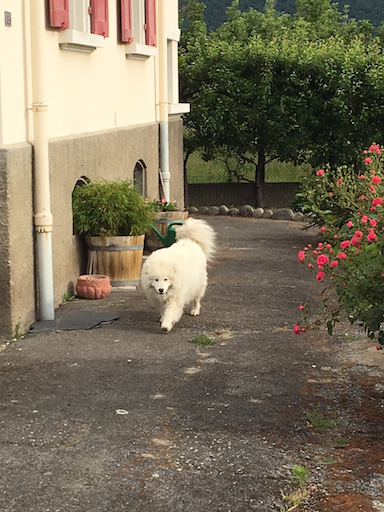

(384, 512)


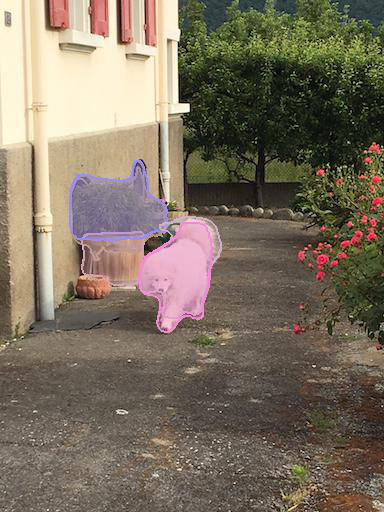

In [12]:
from IPython.display import display
from PIL import Image
import random

image_path = '../deepmask/data/testImage.jpg'
# randomly look at training image
print(Image.open(image_path).size)
display(Image.open(image_path))

image_path = '../deepmask/res.jpg'
# randomly look at training image
print(Image.open(image_path).size)
Image.open(image_path)


(1280, 750)


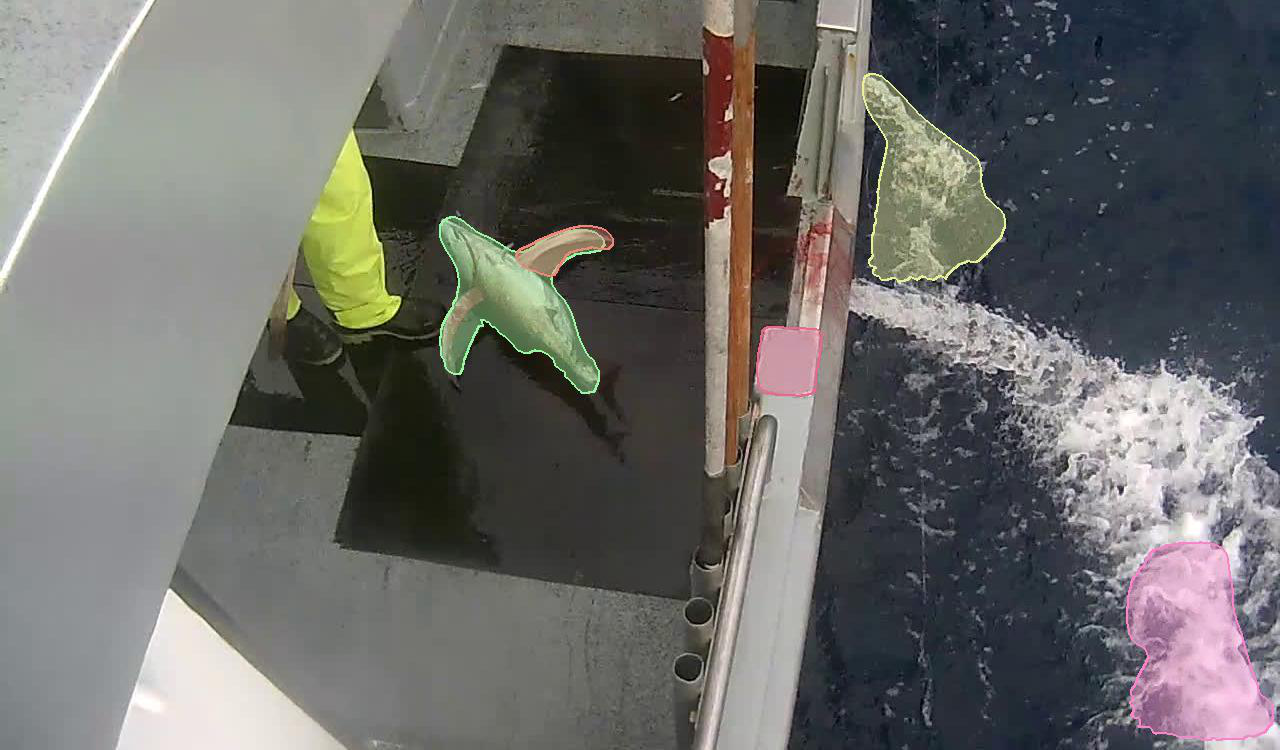

In [13]:
# th computeProposals.lua /home/slaterc/pretrained/deepmask/ -img /mnt/azurefs/data/fisheries/train/YFT/img_07571.jpg  -np 10 -ss .1
image_path = '../deepmask/res.jpg'
# randomly look at training image
im = Image.open(image_path)
print(im.size)
im

In [12]:
a = np.array(im.getdata())
a = a / 255.0
print(a[:,0].mean())
print(a[:,1].mean())
print(a[:,2].mean())
print(a[:,0].std())
print(a[:,1].std())
print(a[:,2].std())

0.407985433007
0.408660825163
0.39942375817
0.239424013407
0.230257720563
0.220212041229


In [15]:
1280*750

960000